In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

100 58.02607587491422
200 135.58669339867825
300 195.3823467732144
400 272.36853004645485
500 349.59146776307665
600 438.9583528284805
700 525.5737859711315
800 613.0810955718586
900 697.1593038195323
1000 795.6995192619569


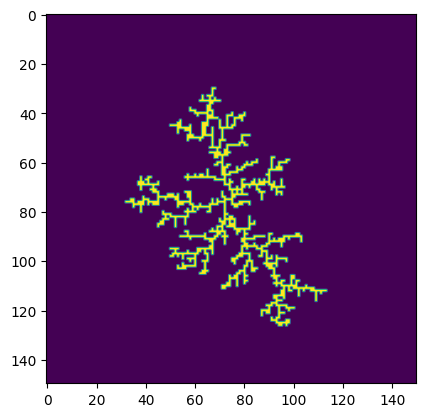

In [24]:
n = 150
grid = np.zeros((n,n))
grid[n//2, n//2] = 1

directions = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])

def get_neighbors(grid):
    return np.roll(grid, 1, axis=0) + np.roll(grid, -1, axis=0) + np.roll(grid, 1, axis=1) + np.roll(grid, -1, axis=1)

def new_position(grid):
    x, y = n//2, n//2
    while grid[x, y] == 1:
        theta = np.random.rand() * 2 * np.pi
        x = int(n//2 * np.cos(theta) + n//2)
        y = int(n//2 * np.sin(theta) + n//2)
    return np.array([x, y])

def step(grid, current, neighbors):
    direction = directions[np.random.randint(0, 4)]
    new = current + direction
    new = np.mod(new, n)
    if neighbors[*new] > 0:
        grid[*new] = 1
        neighbors = get_neighbors(grid)
        return grid, new_position(grid), neighbors, True
    return grid, new, neighbors, False

def radius_of_gyration(grid):
    x, y = np.where(grid == 1)
    x = x - np.mean(x)
    y = y - np.mean(y)
    return np.mean(x**2 + y**2)

current = new_position(grid)
neighbors = get_neighbors(grid)

grid_list = [grid]
gyrations = []
N = []
i = 0
while i < 1000:
    grid, current, neighbors, stopped = step(grid, current, neighbors)
    i += stopped
    if stopped: 
        grid_list.append(grid.copy())
        if i % 100 == 0:
            gyrations.append(radius_of_gyration(grid))
            N.append(i)
            print(i, gyrations[-1])

plt.imshow(grid);

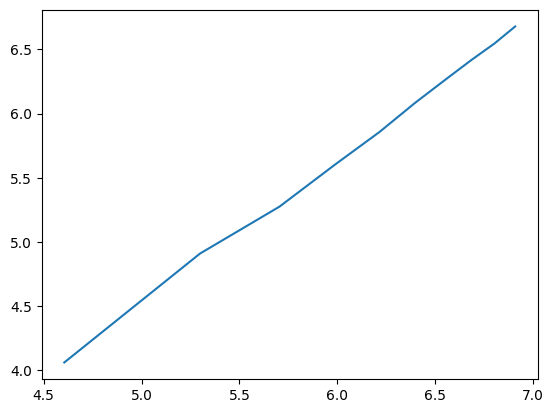

Slope: 1.1257491621196536


In [25]:
plt.plot(np.log(N), np.log(gyrations))
plt.show()

print('Slope:', np.polyfit(np.log(N), np.log(gyrations), 1)[0])

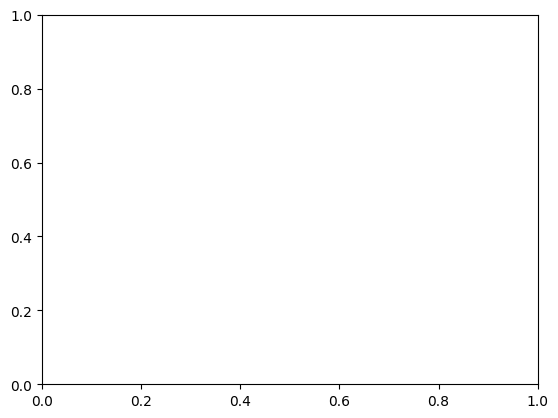

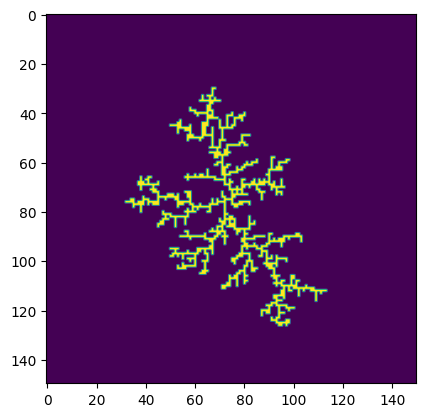

In [26]:
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    ax.imshow(grid_list[5*i])

fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update, frames=200, interval=5)

writer = animation.PillowWriter()
ani.save(f'../images/animation.gif', writer=writer)